# Analysing Twitter Page: WeRateDogs

**by Ali Irtaza**

### Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
  - Detect and document at least eight (8) quality issues and two (2) tidiness issues
- [Clean](#clean)
- [Storing, Analyzing, and Visualizing Data](#store)
  - At least three (3) insights and one (1) visualization must be produced
- [Wrangling Efforts Report](https://github.com/chelseymarie6/Wrangle-and-Analyze-Data)
- [Communicate Findings Report](https://github.com/chelseymarie6/Wrangle-and-Analyze-Data)
- [Sources](#sources)

## Introduction

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

<a id='gather'></a>
### Gathering Data

We will gather the data from three resources:

1. The twitter_archive_enhanced.csv file is provided to me.

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. The file is provided.

3. I will use the tweet-json.txt file to gather each tweet's retweet count and favorite ("like") count at minimum.

In [502]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import requests
import json

1.Importing twitter_archive_enhanced.csv file

In [503]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Gathering tweet image predictions

In [504]:
#Downloading tweet image prediction file using the link provided
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [505]:
#Showing the data that is imported 
images = pd.read_csv('image_predictions.tsv',sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Gathering tweets' retweet count and like counts

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [506]:
# Loading the Twitter API data
twitter_api_df = pd.read_json('C:\\Users\\Ali Irtaza\\Desktop\\Courses\\Udacity\\Data Analyst Nanodegree\\Projects\\Project 4 Wrangle and Analyze Data\\tweet-json.txt', lines=True)
twitter_api_df['tweet_id'] = twitter_api_df['id']
twitter_api_df = twitter_counts_df[['tweet_id', 'favorite_count', 'retweet_count']]

In [507]:
twitter_api_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assessing Data

We have to detect and document at least eight (8) quality issues and two (2) tidiness issues

#### Analyzing Data for Quality and Tidiness Issues

#### Archive Data

In [508]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [509]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [57]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [510]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [511]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [512]:
sum(archive.tweet_id.duplicated())

0

In [513]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Flash        1
Todo         1
Jo           1
Buddah       1
Clarkus      1
Name: name, Length: 957, dtype: int64

In [514]:
archive.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [515]:
archive.query('rating_denominator > 10')['text']

342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aw

In [516]:
archive.query('rating_numerator > 142')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [517]:
archive.query('rating_numerator > 142')['text']

188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
290                                    @markhoppus 182/10
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1634    Two sneaky puppers were not initially seen, mo...
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object

#### Image Prediction Data

In [518]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [519]:
sum(images.tweet_id.duplicated())

0

In [520]:
sum(images.jpg_url.duplicated())

66

In [521]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [522]:
images.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
platypus                1
bow                     1
carton                  1
ocarina                 1
ibex                    1
Name: p1, Length: 378, dtype: int64

In [523]:
images.p2.value_counts

<bound method IndexOpsMixin.value_counts of 0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               Rottweiler
               ...        
2070      English_springer
2071    Labrador_retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object>

In [67]:
images.p3.value_counts

<bound method IndexOpsMixin.value_counts of 0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object>

In [524]:
images['p1']

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [525]:
sum(images.tweet_id.duplicated())

0

#### Twitter API Data(Favourite and Retweet Count)

In [526]:
twitter_api_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [527]:
sum(twitter_api_df.tweet_id.duplicated())

0

In [528]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [529]:
twitter_api_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [530]:
twitter_api_df.sample(50)

,tweet_id,favorite_count,retweet_count
1372,701952816642965504,4167,1149
2280,667211855547486208,516,258
197,854365224396361728,20046,5159
365,828801551087042563,0,3901
1903,674606911342424069,1013,115
467,817056546584727552,9517,1927
1361,702932127499816960,2825,811
2321,666428276349472768,171,90
1074,739606147276148736,5897,1876
1865,675334060156301312,3007,1436


In [531]:
twitter_api_df.sample(50)

,tweet_id,favorite_count,retweet_count
427,821149554670182400,9718,2320
1953,673636718965334016,1194,404
253,844580511645339650,17871,3533
1063,740711788199743490,3736,1062
732,781308096455073793,7973,2961
820,770093767776997377,0,3520
23,887343217045368832,34222,10737
672,789628658055020548,8448,2080
147,863427515083354112,2363,105
2151,669661792646373376,860,482


# Issues Found

## Quality

#### 1. Archive
> There are missing data in the following columns:

1.in_reply_to_status_id
    
2.in_reply_to_user_id
    
3.retweeted_status_id 
    
4.retweeted_status_user_id
    
5.retweeted_status_timestamp

>There are extra columns that aren't useful for the analysis(Some are above columns stated). They should be deleted from the data set.

>The numerator and denominator should be float not integer

>The value of denominator should be 10 only but there are multiples of values too.

>There are some incorrect numerator rating values eg 1776, 960, 666 etc.

>A standard column of Rating should be there that shows the truely value of the dogs rating

>The column timestamp is object type where it should be timestamp

>There are some invalid names of dogs that should should be corrected.

>The tweet_id is in integer data type. It should be string data type after merging all the data


#### 2.Image Prediction

>There are 66 duplicated urls that should be removed from the data

>There are invalid data in column p1,p2,p3 like ibex ,bagel, fruits name like banana and etc

>There are extra columns that aren't useful for the analysis

>There should be one column for prediction and one column for the confidence 

>The tweet_id is in integer data type. It should be string data type after merging all the data

#### 3. Twitter API Data

>There are some missing values in the data

>The tweet_id is in integer data type. It should be string data type after merging all the data

## Tidiness

> The last four columns in archive data ie doggo,floofer,pupper,puppo should not have seperate columns,they should have one column as every tweet_id should have any one observation from these type.

>All tables should be part of one data set


## Cleaning of Data

We should make copy of the dataframes

In [532]:
archive_copy = archive.copy()
images_copy = images.copy()
twitter_api_copy = twitter_api_df.copy()


### Define 
1. The four different types of dog should be in a same column 

2. The column timestamp is object type where it should be timestamp

3. Convert Numerator Rating and Denomenator Denominator rating from int to float in archive

4. Correcting naming issues of the dog

5. Deleting duplicates url_jpg from image prediction data

6. Creating 1 column for Prediction and 1 column for Confidence in image prediction data

7. Deleting extra columns from the image prediction data set

8. Merge all three data sets

9. Deleting retweets from the data

10. Removing all the columns that are not useful for analysis

11. Convert tweetid from integer to string

12. Creating a standard 'rating' column from numerator and denominator ratings that shows the true value of rating

#### 1. The four different types of dog's columns should be in a same column i.e Dog_Type

In [533]:
#Code 

archive_copy['dog_breed_type'] = archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')
archive_copy = archive_copy.drop(['doggo','floofer','pupper','puppo'],1)

In [534]:
#Test
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_breed_type              399 n

### 2.The column timestamp is object type where it should be timestamp

In [538]:
#Code
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

In [539]:
#Test 
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### 3. Convert Numerator and denominator from int to float in archive data

In [540]:
#Code

archive_copy[['rating_numerator','rating_denominator']] = archive_copy[['rating_numerator','rating_denominator']].astype(float)

In [541]:
#Test
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

### 4. Correcting naming issues of the dog in archive data


In [542]:
#Code.
archive_copy['name'] = archive_copy['name'].str.replace('^[a-z]+', 'None')

In [543]:
#Test
archive_copy['name'].value_counts()

None       854
Charlie     12
Oliver      11
Lucy        11
Cooper      11
          ... 
Todo         1
Jo           1
Buddah       1
Jeb          1
Clarkus      1
Name: name, Length: 932, dtype: int64

### 5. Deleting duplicates url_jpg from image prediction data

In [544]:
#Code
sum(images_copy['jpg_url'].duplicated())

66

In [545]:
images_copy[images_copy['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [546]:
images_copy = images_copy.drop_duplicates(subset=['jpg_url'])

In [547]:
#Test
sum(images_copy.duplicated())

0

### 6. Creating 1 column for Prediction and 1 column for Confidence in image prediction data

In [548]:
#CODE: 
type_of_dog = []
list_of_confidence = []

def images(images_copy):
    if images_copy['p1_dog'] == True:
        type_of_dog.append(images_copy['p1'])
        list_of_confidence.append(images_copy['p1_conf'])
    elif images_copy['p2_dog'] == True:
        type_of_dog.append(images_copy['p2'])
        list_of_confidence.append(images_copy['p2_conf'])
    elif images_copy['p3_dog'] == True:
        type_of_dog.append(images_copy['p3'])
        list_of_confidence.append(images_copy['p3_conf'])
    else:
        type_of_dog.append('Error')
        list_of_confidence.append('Error')
    
images_copy.apply(images, axis=1)

#creating new columns
images_copy['dog_type'] = type_of_dog
images_copy['confidence_list'] = list_of_confidence

In [549]:
#Droping the rows with error
images_copy = images_copy[images_copy['dog_type'] != 'Error']

In [550]:
#Test
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [552]:
#Test
images_copy.dog_type.count()

1691

### 7. Deleting extra columns from the image prediction data set

In [553]:
#Code
images_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type',
       'confidence_list'],
      dtype='object')

In [554]:
images_copy = images_copy.drop(['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1)

In [555]:
#Test
images_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_type', 'confidence_list'], dtype='object')

### 8. Merge all three data sets

In [556]:
#Code
twitter_df = pd.merge(archive_copy, 
                      images_copy, 
                      how = 'left', on = ['tweet_id'])

#We will keep all the rows that have jpg url 
twitter_df = twitter_df[twitter_df['jpg_url'].notnull()]

In [557]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 1 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1691 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1691 non-null   datetime64[ns, UTC]
 4   source                      1691 non-null   object             
 5   text                        1691 non-null   object             
 6   retweeted_status_id         5 non-null      float64            
 7   retweeted_status_user_id    5 non-null      float64            
 8   retweeted_status_timestamp  5 non-null      object             
 9   expanded_urls               1691 non-null   object             
 10  rating_numerator            1691 non-null   float64         

In [558]:
twitter_final_df = pd.merge(twitter_df,twitter_api_copy,how='left',on=['tweet_id'])

In [559]:
twitter_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1690
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1691 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1691 non-null   datetime64[ns, UTC]
 4   source                      1691 non-null   object             
 5   text                        1691 non-null   object             
 6   retweeted_status_id         5 non-null      float64            
 7   retweeted_status_user_id    5 non-null      float64            
 8   retweeted_status_timestamp  5 non-null      object             
 9   expanded_urls               1691 non-null   object             
 10  rating_numerator            1691 non-null   float64         

### 9. Deleting retweets from the data

In [560]:
#Code
twitter_final_df = twitter_final_df[np.isnan(twitter_final_df.retweeted_status_id)]

In [561]:
#Test
twitter_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1690
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1686 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1686 non-null   datetime64[ns, UTC]
 4   source                      1686 non-null   object             
 5   text                        1686 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1686 non-null   object             
 10  rating_numerator            1686 non-null   float64         

### 10. Removing all the columns that are not useful for analysis

In [562]:
#Code
twitter_final_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed_type', 'jpg_url', 'img_num',
       'dog_type', 'confidence_list', 'favorite_count', 'retweet_count'],
      dtype='object')

In [563]:
twitter_final_df = twitter_final_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
                                          'retweeted_status_id', 'retweeted_status_user_id','img_num','retweeted_status_timestamp'],axis=1)

In [566]:
#Test
twitter_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   text                1686 non-null   object             
 3   expanded_urls       1686 non-null   object             
 4   rating_numerator    1686 non-null   float64            
 5   rating_denominator  1686 non-null   float64            
 6   name                1686 non-null   object             
 7   dog_breed_type      274 non-null    object             
 8   jpg_url             1686 non-null   object             
 9   dog_type            1686 non-null   object             
 10  confidence_list     1686 non-null   object             
 11  favorite_count      1686 non-null   int64              
 12  retweet_count       1686 non-null 

### 11. Changing tweetid data type from integer to string

In [567]:
#Code
twitter_final_df['tweet_id'] = twitter_final_df['tweet_id'].astype(str)

In [568]:
#Test
twitter_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   text                1686 non-null   object             
 3   expanded_urls       1686 non-null   object             
 4   rating_numerator    1686 non-null   float64            
 5   rating_denominator  1686 non-null   float64            
 6   name                1686 non-null   object             
 7   dog_breed_type      274 non-null    object             
 8   jpg_url             1686 non-null   object             
 9   dog_type            1686 non-null   object             
 10  confidence_list     1686 non-null   object             
 11  favorite_count      1686 non-null   int64              
 12  retweet_count       1686 non-null 

### 12. Creating a standard 'rating' column from numerator and denominator ratings that shows the true value of rating

In [569]:
#Code
twitter_final_df['rating'] = twitter_final_df['rating_numerator'] / twitter_final_df['rating_denominator']

In [463]:
#Test
twitter_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1690
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   text                1686 non-null   object             
 3   expanded_urls       1686 non-null   object             
 4   rating_numerator    1686 non-null   float64            
 5   rating_denominator  1686 non-null   float64            
 6   name                1686 non-null   object             
 7   dog_breed_type      274 non-null    object             
 8   jpg_url             1686 non-null   object             
 9   dog_type            1686 non-null   object             
 10  confidence_list     1686 non-null   object             
 11  favorite_count      1686 non-null   int64              
 12  retweet_count       1686 non-null 

In [571]:
#Test
twitter_final_df.rating.value_counts()

1.200000    426
1.000000    362
1.100000    362
1.300000    229
0.900000    133
0.800000     68
0.700000     31
1.400000     23
0.600000     16
0.500000     15
0.400000      6
0.300000      5
0.200000      3
2.700000      1
0.636364      1
2.600000      1
0.818182      1
7.500000      1
0.000000      1
3.428571      1
Name: rating, dtype: int64

# Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

In [572]:
twitter_final_df.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### At least three (3) insights and one (1) visualization must be produced.

In [491]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

**1.What is the most common type of dog?**

In [573]:
twitter_final_df['dog_breed_type'].value_counts()

pupper     183
doggo       61
puppo       27
floofer      3
Name: dog_breed_type, dtype: int64

The most common type of dog is Pupper

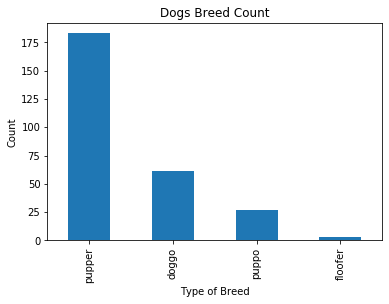

In [574]:
twitter_final_df['dog_breed_type'].value_counts().plot(kind='bar')
plt.xlabel("Type of Breed")
plt.ylabel("Count")
plt.title("Dogs Breed Count");

**2.Which dog's breed is the most common among all? Name some least common dogs too**

In [575]:
#Code
twitter_final_df['dog_type'].value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
standard_schnauzer        1
Bouvier_des_Flandres      1
Scotch_terrier            1
Irish_wolfhound           1
silky_terrier             1
Name: dog_type, Length: 113, dtype: int64

The most common dog's breed is the Golden Retriever and the least common dog are for example Silky terrier,Irish Wolfhound,Scotch Terrier and etc.

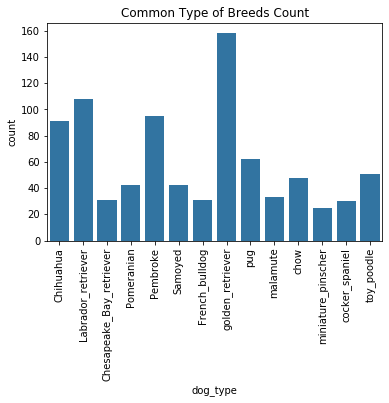

In [576]:
base_color = sb.color_palette()[0]
dog_type = twitter_final_df.groupby('dog_type').filter(lambda x: len(x) >= 25)
sb.countplot(data=dog_type , x='dog_type',color=base_color);
plt.xticks(rotation=90)
plt.title('Common Type of Breeds Count');

**3.What are the most common dogs names?**

In [577]:
twitter_final_df['name'].value_counts()

None         499
Lucy          10
Charlie       10
Cooper        10
Oliver         9
            ... 
Genevieve      1
Kenny          1
Jeremy         1
Kial           1
Clarkus        1
Name: name, Length: 834, dtype: int64

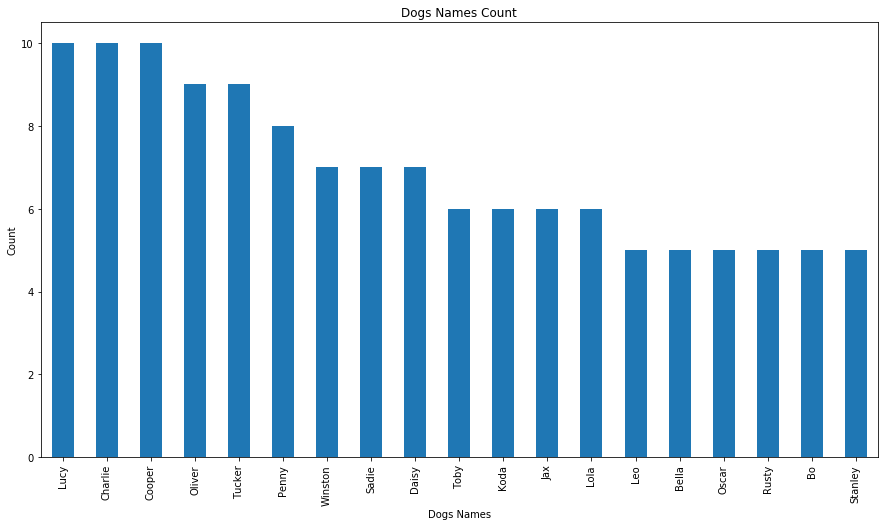

In [578]:
twitter_final_df.name.value_counts()[1:20].plot(kind='bar',figsize=(15,8))
plt.xlabel('Dogs Names')
plt.ylabel('Count')
plt.title('Dogs Names Count');

We can see that the most common names of dogs are Lucy,Charlie and Cooper.

**4.What is the mean average rating?**

In [579]:
twitter_final_df['rating'].mean()

1.0891952057432506

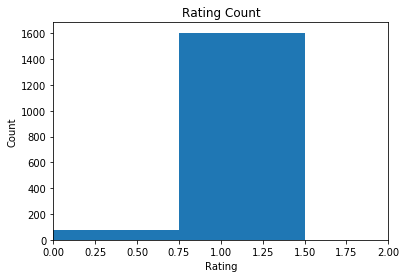

In [583]:
twitter_final_df['rating'].plot(kind='hist')
plt.xlabel('Rating')
plt.ylabel("Count")
plt.title('Rating Count')
plt.xlim(0,2);

The mean average rating of the dogs is approximately 1

**5.What is the relation of favourite count and retweet count?**

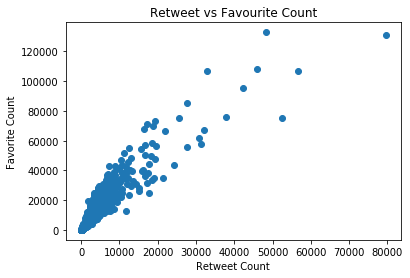

In [585]:
plt.scatter(data=twitter_final_df,x='retweet_count',y='favorite_count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweet vs Favourite Count');

The relation of Favourite Count and Retweet Count is positively correlated.